In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

df = pd.read_csv('./datasets/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Survived : 0 = 사망, 1 = 생존
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [3]:
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int

In [4]:
# 중복된 값이 없는 ID, Name 제거
df = df.drop(['PassengerId', 'Name'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [5]:
for i in df.columns:
    print('\33[103m', i, '\33[0m')
    print(df[i].value_counts())
    uu = str(df[i].unique())
    print('\33[91m' + uu +  '\033[0m')
    print('\33[94m' + 'Null Count :' + '\033[0m', df[i].isnull().sum())
    print('🌈')
    print()

 Survived 
0    549
1    342
Name: Survived, dtype: int64
[0 1]
Null Count : 0
🌈

 Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64
[3 1 2]
Null Count : 0
🌈

 Sex 
male      577
female    314
Name: Sex, dtype: int64
['male' 'female']
Null Count : 0
🌈

 Age 
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Null Count : 177
🌈

 SibSp 
0   

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

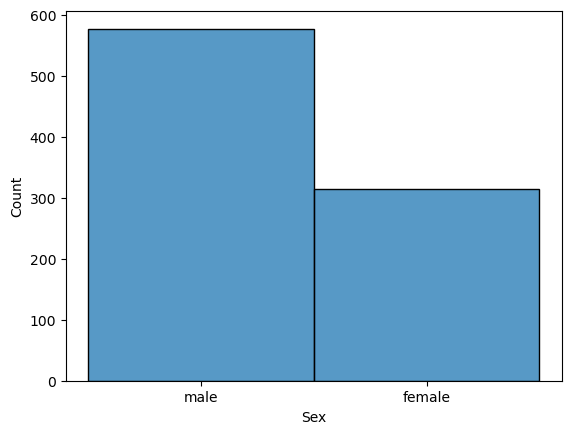

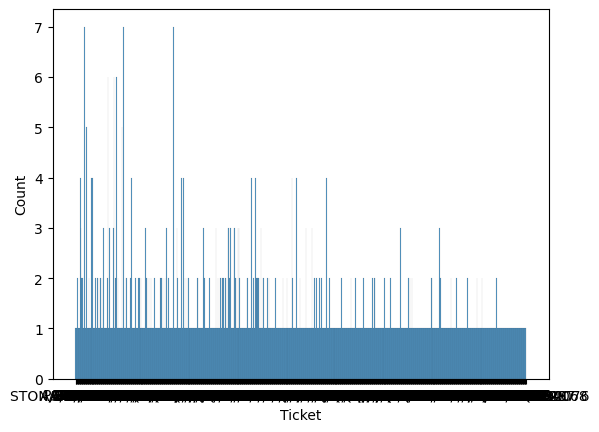

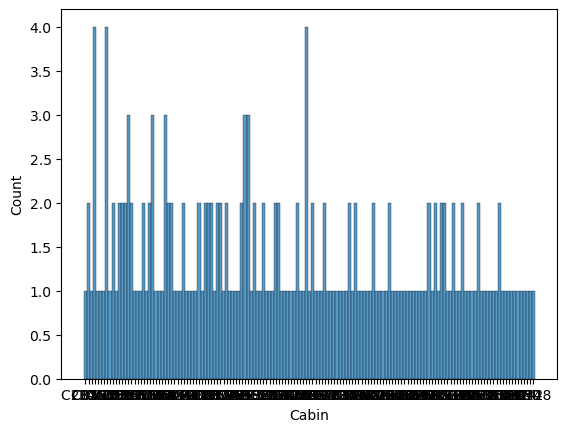

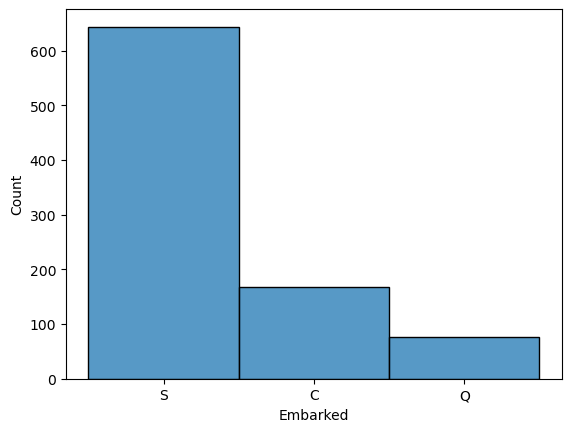

In [7]:
# categorical histogram

for col in df[['Sex', 'Ticket', 'Cabin', 'Embarked']].columns:
    fig = sns.histplot(df, x=col)
    plt.show()

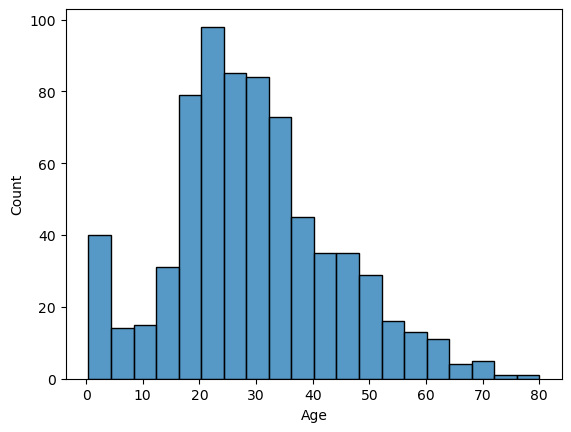

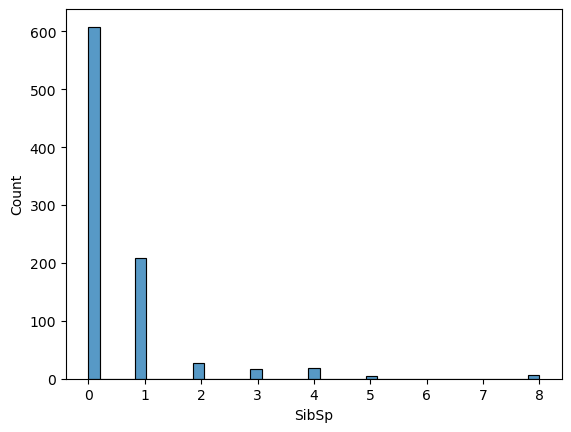

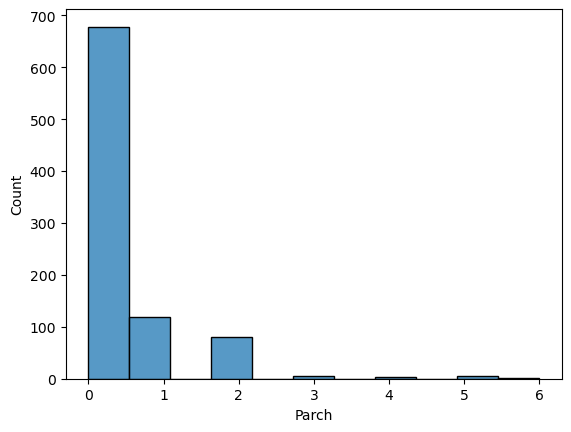

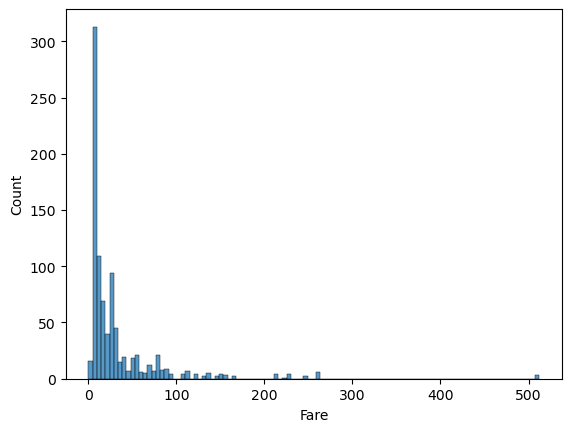

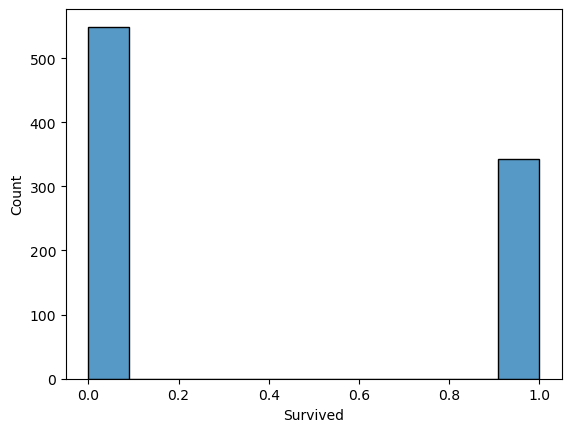

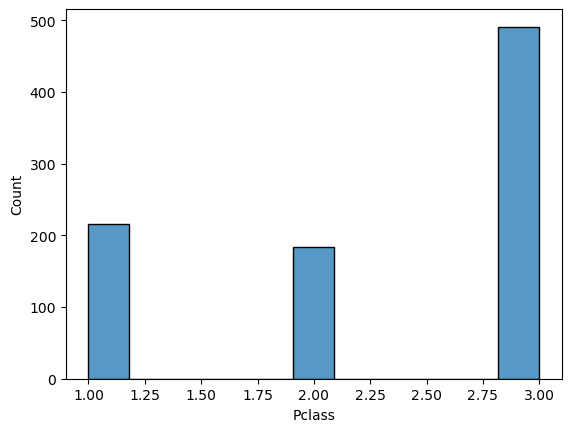

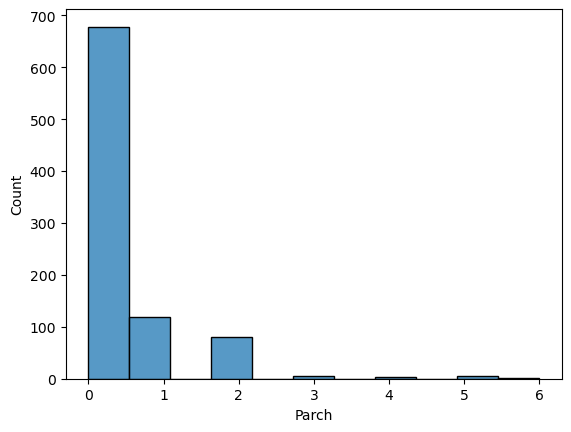

In [8]:
# numerical histplot

for col in df[['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass', 'Parch']].columns:
    fig = sns.histplot(df, x=col)
    plt.show()

# Preprocessing

In [9]:
# Cabin : Null 값이 많으므로 삭제
# Age : 평균값으로 대체 
# Embarked : 최빈값으로 대체 

df = df.drop(['Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

# Encoding

In [10]:
# One-hot Encoding : Sex, Embarked
# Ticket는 종류가 약 700개로 많아서 One-hot Encoding에 무리가 있어보임, 전체의 약 80%가 unique값이기 때문에 제거하는것도 괜찮아보임
# 일단 Ticket 컬럼은 label encoding 진행

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# encoder = LabelEncoder()
# labels = encoder.fit_transform(df['Ticket'])
# df['Ticket'] = labels
df = df.drop(['Ticket'], axis=1)

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

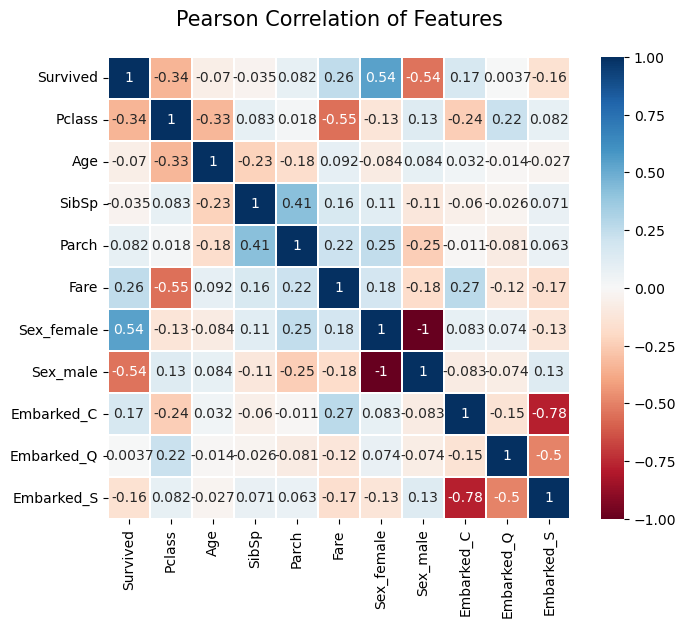

In [13]:
# heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Train Test Split

In [ ]:
X = df.drop(['Survived'], axis=1)
y = df.Survived

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=777)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

# Feature Scaling

In [ ]:
for col in X_train.columns:
   # Standardization _ Standard
   st_scaler = StandardScaler()
   st_scaled = st_scaler.fit_transform(X_train[[col]])
   X_train[[col]] = st_scaled

   # Normalization _ MinMax
   mm_scaler = MinMaxScaler()
   mm_scaled = mm_scaler.fit_transform(X_train[[col]])
   X_train[[col]] = mm_scaled

   # Same Scaler to validation Data
   st_scaled_t = st_scaler.transform(X_val[[col]])
   X_val[[col]] = st_scaled_t
   mm_scaled_t = mm_scaler.transform(X_val[[col]])
   X_val[[col]] = mm_scaled_t

# Modeling

In [ ]:
# Model Load
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = xgb.XGBClassifier()
lgb = lgb.LGBMClassifier()

# Training 
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

# Predict 
dt_pred = dt.predict(X_val)
rf_pred = rf.predict(X_val)
xgb_pred = xgb.predict(X_val)
lgb_pred = lgb.predict(X_val)

In [ ]:
model_lst = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
pred_lst = [dt_pred, rf_pred, xgb_pred, lgb_pred]

In [ ]:
for m, pred in zip(model_lst, pred_lst):
    print('🔻','\33[91m' + m + '\033[0m', '🔻')
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()


In [ ]:
'''
version1.
- Ticket Column LabelEncoding

🔻 Decision Tree 🔻
Accuracy: 0.7430167597765364
Precision: 0.6212121212121212
Recall: 0.6612903225806451
F1 Score: 0.640625

🔻 Random Forest 🔻
Accuracy: 0.8100558659217877
Precision: 0.7413793103448276
Recall: 0.6935483870967742
F1 Score: 0.7166666666666668

🔻 XGBoost 🔻
Accuracy: 0.776536312849162
Precision: 0.6833333333333333
Recall: 0.6612903225806451
F1 Score: 0.6721311475409835

🔻 LightGBM 🔻
Accuracy: 0.776536312849162
Precision: 0.7037037037037037
Recall: 0.6129032258064516
F1 Score: 0.6551724137931035

================================
version2. 
- Drop Ticket Column

🔻 Decision Tree 🔻
Accuracy: 0.7597765363128491
Precision: 0.6507936507936508
Recall: 0.6612903225806451
F1 Score: 0.656

🔻 Random Forest 🔻
Accuracy: 0.7988826815642458
Precision: 0.7321428571428571
Recall: 0.6612903225806451
F1 Score: 0.6949152542372881

🔻 XGBoost 🔻
Accuracy: 0.7821229050279329
Precision: 0.7090909090909091
Recall: 0.6290322580645161
F1 Score: 0.6666666666666666

🔻 LightGBM 🔻
Accuracy: 0.7877094972067039
Precision: 0.7222222222222222
Recall: 0.6290322580645161
F1 Score: 0.6724137931034483

================================
'''